# <a id='toc1_'></a>[PCE:Couplage de Openbabel ,xTB,CREST,Pyscf,DFT.HF,DFT4 et  AlGORITHME DE SCHARBER( model de Tartarus)  ](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique


04 JUILLET 2024

### <a id='toc1_'></a>[Utilisation de Pandas  pour extraire les information dans le fichiers hce.csv et creer un DataFrame](#toc0_)
<!-- ![MolecularDimension.png](attachment:MolecularDimension.png) -->
![MolecularDimension.png](./Graphics/Pandas.jpg)

In [47]:
import pandas.util  # Assuming 'util' is an alias for pandas.util
import pandas as pd
# Read the CSV file
df1 = pd.read_csv("best_GDB9.csv")
df1

# Filter rows with pce_1 > 10

smiles_key                SMILES    HOMO    LUMO     Gap  HOMO(eV)  \
0           gdb 6                   C=O -0.2670 -0.0406  0.2263 -7.265440   
1          gdb 11                  CC=O -0.2540 -0.0198  0.2342 -6.911692   
2          gdb 18               CC(C)=O -0.2431 -0.0087  0.2344 -6.615088   
3          gdb 23                C#CC#C -0.2599 -0.0214  0.2386 -7.072239   
4          gdb 24                C#CC#N -0.3102 -0.0543  0.2559 -8.440972   
...           ...                   ...     ...     ...     ...       ...   
52602  gdb 133850  CC12C3C4CC(N13)C2=C4 -0.1864 -0.0059  0.1805 -5.072202   
52603  gdb 133853    OC12C3C1N1CC3N=C21 -0.2087 -0.0889  0.1198 -5.679016   
52604  gdb 133857    CC1C2C3C4=CCC13C24 -0.2014 -0.0515  0.1498 -5.480373   
52605  gdb 133859    CN1C2C3C4=CCC13C24 -0.2044 -0.0550  0.1494 -5.562007   
52606  gdb 133863     C1C2CC3CC4CC1C234 -0.2008 -0.0152  0.1856 -5.464046   

       LUMO(eV)   Gap(eV)  
0     -1.104782  6.157937  
1     -0.538785  6.372907  
2     -0.236739  6.378349  
3     -0.582324  6.492637  
4     -1.477578  6.963394  
...         ...       ...  
52602 -0.160547  4.911655  
52603 -2.419092  3.259924  
52604 -1.401386  4.076266  
52605 -1.496626  4.065381  
52606 -0.413613  5.050433  

[52607 rows x 8 columns]

In [48]:
df=df1.iloc[0:3,:]
my1_df=df
my1_df

smiles_key   SMILES    HOMO    LUMO     Gap  HOMO(eV)  LUMO(eV)   Gap(eV)
0      gdb 6      C=O -0.2670 -0.0406  0.2263 -7.265440 -1.104782  6.157937
1     gdb 11     CC=O -0.2540 -0.0198  0.2342 -6.911692 -0.538785  6.372907
2     gdb 18  CC(C)=O -0.2431 -0.0087  0.2344 -6.615088 -0.236739  6.378349

####  <a id='toc1_3_'></a>[Utilisation de `RDKIT`pour la generer des coordonnees 3D xyz](#toc0_)

<img src="./Graphics/Rdkit.png" width="400"></center>

#### <a id='toc1_1_'></a>[Representation Moleculaire et Descripteurs](#toc0_)
1.**Descripteurs 0D**. Concernant les discripteurs « Composition », ne fournissent aucune information sur la structure moléculaire ou la connectivité des atomes.

2.**Descripteurs 1D**. Lié à des ensembles de sous-structures telles que des groupes fonctionnels.

3.**Descripteurs 2D**. Fonctionnalités fournissant des informations sur la topologie moléculaire basées sur la représentation graphique des molécules.

4.**Descripteurs 3D**. Caractéristiques géométriques fournissant des informations sur les coordonnées spatiales des atomes d'une molécule.

5.**Descripteurs 4D**. Également appelés **descripteurs basés sur une grille**, introduisent une quatrième dimension caractérisant les interactions entre les molécules et les sites actifs d'un récepteur ou les multiples états conformationnels des molécules.


<!-- ![MolecularDimension.png](attachment:MolecularDimension.png) -->
![MolecularDimension.png](./Graphics/MolecularDimension.png)


####  <a id='toc1_3_'></a>[Représentation des molécules 3D avec py3Dmol ](#toc0_)

####  <a id='toc1_3_'></a>[Utilisation de crest et xTB pour la recherches des conformers](#toc0_)
 <center> <img src = "./Graphics/crest.png" width = "600">
 <img src = "./Graphics/xtb.jpeg" width = "600"> </center> 
 


####  <a id='toc1_3_'></a>[Workflow de Crest et xTB dans la recherches des conformers ](#toc0_)
 <center> <img src = "./Graphics/crestfeatures2.png" width = "600">
 <img src = "./Graphics/workflow.jpeg" width = "600"> </center> 

In [49]:
!xtb --version

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.5.1 (fef0646) compiled by 'conda@b96dff2e9fd6' on 2023-01-04

normal termination of xtb


In [50]:
!crest --version

/bin/bash: line 1: /home/mvotokps/anaconda3/envs/tartarus/bin/crest: Permission denied


In [51]:
def find_homo_lumo(mf_pyscf, au2ev):
    """Function that returns the HOMO and LUMO index and the HOMO energy in eV

    Args:
        mf_pyscf (pyscf object): pyscf meam-field object of the molecule to be evaluated.
    """
    # Index of HOMO and LUMO
    lumo_idx = mf_pyscf.mo_occ.tolist().index(0.)
    homo_idx = lumo_idx - 1

    # Calculate the HOMO Homo-LUMO
    E_HOMO = mf_pyscf.mo_energy[homo_idx]*au2ev
    E_LUMO = mf_pyscf.mo_energy[lumo_idx]*au2ev
    E_g = abs(E_HOMO - E_LUMO)

    return E_HOMO, E_LUMO, E_g

In [52]:
import os
MY_crest3_GDB9_DATA = os.path.join(os.getcwd(), 'MY_crest3_GDB9_DATA')
os.makedirs(MY_crest3_GDB9_DATA, exist_ok=True)

e_cc2 = cc2_obj.run()
homo_energy = e_cc2.t1[0, 0]
lumo_energy = e_cc2.t1[0, 1]
gap = lumo_energy - homo_energy

# COMMANDE CREST
crest struc.xyz --gfn2 --gbsa h2o -T 4

conda install dftd4

In [53]:
import pyscf
pyscf.__version__

'2.6.0'

In [54]:

import subprocess
from contextlib import contextmanager, redirect_stderr, redirect_stdout
from os import devnull
from rdkit import Chem
import pandas as pd
import rdkit
import subprocess as sp
from pyscf import dft,scf,gto
import re
from pyscf.data import nist
import dftd4.pyscf as disp
#conversion en eV
au2ev = nist.HARTREE2EV

@contextmanager
def suppress_output(verbose):
    """Suppress output when verbose is False"""
    if verbose:
        yield
    else:
        with open(devnull, 'w') as fnull:
            with redirect_stderr(fnull), redirect_stdout(fnull):
                yield

def run_command(command, verbose):
    if verbose:
        result = subprocess.run(command, shell=True)
    else:
        result = subprocess.run(command, shell=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    return result.returncode

def calculate_properties(df, working_dir, verbose=0):
    """
    Calculates molecular properties for SMILES strings in a DataFrame,
    handling xtb convergence errors and filtering unsuccessful molecules.

    Args:
        df (pandas.DataFrame): A DataFrame containing a "smiles" column.
        working_dir (str): The directory to use for calculations and temporary files.
        verbose (int): Verbosity level (0: no output, 1: output)

    Returns:
        pandas.DataFrame: A DataFrame containing calculated properties for successful molecules.
    """
    
    dtb = []
    yesso = ["smiles_key","SMILES","HOMO(eV)","HOMO_xtb(eV)","HOMO_HF(eV)","HOMO_DFT(eV)","HOMO_dftd4(eV)","LUMO(eV)","LUMO_xtb(eV)","LUMO_HF(eV)","LUMO_DFT(eV)","LUMO_dftd4(eV)","GAP(eV)","GAP_xtb(eV)","GAP_HF(eV)", "GAP_DFT(eV)","GAP_dftd4(eV)"]

    filtered_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    for i in range(len(filtered_df)):
        smiles = filtered_df.loc[i,"SMILES"]
        smiles_key = filtered_df.loc[i,"smiles_key"]
        HOMO = filtered_df.loc[i,"HOMO(eV)"]
        LUMO = filtered_df.loc[i,"LUMO(eV)"]
        GAP = filtered_df.loc[i,"Gap(eV)"]
        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)
        charge = Chem.rdmolops.GetFormalCharge(mol)
        atom_number = mol.GetNumAtoms()

        # Create a single directory for all calculations
        directory = os.path.join(working_dir, smiles_key)
        os.makedirs(directory, exist_ok=True)

        # Change directory for calculations
        os.chdir(directory)

        # Write the SMILES to a file
        with open('test.smi', 'w') as f:
            f.write(smiles)

        # Prepare the input file
        os.system('obabel test.smi --gen3D -O test.xyz')

        # Run the preliminary xtb
        command_pre = f'xtb test.xyz --gfn 2 --opt vtight --chgr {charge} --iterations 4000'

        with suppress_output(verbose):
            try:
                # Run xtb with error handling
                result = run_command(command_pre, verbose=5)
                if result != 0:
                    print(f"xtb preliminary optimization failed for '{smiles}'. Skipping.")
                    filtered_df.drop(i, inplace=True)  # Remove molecule from DataFrame
                    continue  # Skip to the next molecule
            except Exception as e:
                print(f"An error occurred while running xtb for '{smiles}': {e}")
                filtered_df.drop(i, inplace=True)  # Remove molecule from DataFrame
                continue  # Skip to the next molecule

        os.system("rm -f ./gfnff_charges ./gfnff_topo")  # Optional removal

        # Run crest conformer ensemble
        command_crest = f'crest xtbopt.xyz --gfn2 --gbsa h2o -gff -mquick --chrg {charge} -T 4 --noreftopo'

        with suppress_output(verbose):
            try:
                result = run_command(command_crest, verbose)
                if result != 0:
                    print(f"Crest conformer search failed for '{smiles}'. Skipping.")
                    filtered_df.drop(i, inplace=True)  # Remove molecule from DataFrame
                    continue  # Skip to the next molecule
            except Exception as e:
                print(f"An error occurred while running crest for '{smiles}': {e}")
                filtered_df.drop(i, inplace=True)  # Remove molecule from DataFrame
                continue  # Skip to the next molecule

        # Check if crest_conformers.xyz exists
        if not os.path.exists('crest_conformers.xyz'):
            print(f"Conformer file not found for '{smiles}'. Skipping.")
            filtered_df.drop(i, inplace=True)  # Remove molecule from DataFrame
            continue  # Skip to the next molecule

        os.system(f'head -n {atom_number + 2} crest_conformers.xyz > crest_best.xyz')

        # Run the final
                # Run the calculation
                
        command = f'xtb crest_best.xyz --gfn 2 --opt vtight --chgr {charge} --iterations 4000> out_dump'

        try:
            # Run xtb with error handling
            result = os.system(command)
            if result != 0:
                print(f"xtb final optimization failed for '{smiles}'. Skipping.")
                filtered_df.drop(i, inplace=True)  # Remove molecule from DataFrame
                continue  # Skip to the next molecule
        except Exception as e:
            print(f"An error occurred while running xtb for '{smiles}': {e}")
            filtered_df.drop(i, inplace=True)  # Remove molecule from DataFrame
            continue  # Skip to the next molecule

        # Read the output (implementation details omitted)
        # Read the output
        with open('./out_dump', 'r') as f:
            text_content = f.readlines()
        output_index = [i for i in range(len(text_content)) if 'Property Printout' in text_content[i]]
        text_content = text_content[output_index[0]:]
        homo_data = [x for x in text_content if '(HOMO)' in x]
        lumo_data = [x for x in text_content if '(LUMO)' in x]
        homo_lumo_gap = [x for x in text_content if 'HOMO-LUMO GAP' in x]
        mol_dipole = [text_content[i:i+4] for i, x in enumerate(text_content) if 'molecular dipole:' in x]
        lumo_val = float(lumo_data[0].split(' ')[-2])
        homo_val = float(homo_data[0].split(' ')[-2])
        homo_lumo_val = float(homo_lumo_gap[0].split(' ')[-5])
        mol_dipole_val = float(mol_dipole[0][-1].split(' ')[-1])
        # Write the properties to a single file (modify as needed)
        with open(os.path.join(directory, 'properties.txt'), 'a') as f:
            f.write(f'SMILES: {smiles}\n')
            f.write(f'LUMO: {lumo_val}\n')
            f.write(f'HOMO: {homo_val}\n')
            f.write(f'HOMO-LUMO GAP: {homo_lumo_val}\n')
        
        # Skip to the next molecule
        with open('crest_best.xyz', 'r') as f:
            lines = f.readlines()

          #  Supprimer les deux premières lignes
        mol_xtb_xyz = '\n'.join(lines[2:])
        # supression de la premiere ligne (nombre d'atomes) pour les donnees XYZ
        #lines = mol_xtb_xyz.strip().split('\n')
        #mol_xtb_xyz = '\n'.join(lines[1:])

        mol_pyscf = gto.Mole(
            atom=mol_xtb_xyz,
            charge=0,
            spin=0,
            basis="6-31G(2df,p)",
            symmetry=True,
            unit='Angstrom'
        )
        mol_pyscf.build()
        myhf = scf.RHF(mol_pyscf).run()
        mdf = dft.RKS(mol_pyscf, xc="B3LYP").run()
        mdft = mdf.newton()
        mdft = disp.energy(mdft).run() 

        Eks_homo, Eks_lumo, Eks_g = find_homo_lumo(myhf, au2ev)
        Eks1_homo, Eks1_lumo, Eks1_g = find_homo_lumo(mdf, au2ev)
        Ekcc_homo, Ekcc_lumo, Ekcc_g =  find_homo_lumo(mdft, au2ev)


        dtb.append([smiles_key,smiles,HOMO,homo_val,Eks_homo,Eks1_homo,Ekcc_homo,LUMO,lumo_val,Eks_lumo,Eks1_lumo,Ekcc_lumo,GAP,homo_lumo_val,Eks_g ,Eks1_g ,Ekcc_g ])
        
        os.chdir('..')

    df_ENEGY = pd.DataFrame(dtb, columns=yesso)
    return  df_ENEGY

df_ENEGY= calculate_properties(df,MY_crest3_GDB9_DATA)
df_ENEGY.to_csv('NEWS_DFT_HF_XTB_DFTD4.csv', index=False) 

1 molecule converted


      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.5.1 (fef0646) compiled by 'conda@b96dff2e9fd6' on 2023-01-04

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; w

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
1 molecule converted


      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.5.1 (fef0646) compiled by 'conda@b96dff2e9fd6' on 2023-01-04

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; w

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL
1 molecule converted


      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.5.1 (fef0646) compiled by 'conda@b96dff2e9fd6' on 2023-01-04

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; w

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_DENORMAL


In [ ]:
MY_OBABEL_crest3_DATA = os.path.join(os.getcwd(), 'MY_OBABEL_crest3_DATA ')
os.makedirs(MY_OBABEL_crest3_DATA , exist_ok=True)


In [26]:
def calculate_properties(df, working_dir):
    """
    Calculates molecular properties for SMILES strings in a DataFrame,
    handling xtb convergence errors and filtering unsuccessful molecules.

    Args:
        df (pandas.DataFrame): A DataFrame containing a "smiles" column.
        working_dir (str): The directory to use for calculations and temporary files.

    Returns:
        pandas.DataFrame: A DataFrame containing calculated properties for successful molecules.
    """
    
    dtb = []
    yesso = ["smiles_key","HOMO_HF(eV)","HOMO_DFT(eV)","HOMO_dftd4(eV)","LUMO_HF(eV)","LUMO_DFT(eV)","LUMO_dftd4(eV)","GAP_HF(eV)", "GAP_DFT(eV)","GAP_dftd4(eV)"]


    filtered_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    for i in range(len(filtered_df)):
        smiles = filtered_df.loc[i, "smiles"]
        smiles_key = filtered_df.loc[i, "smiles_key"]

        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)
        charge = Chem.rdmolops.GetFormalCharge(mol)
        atom_number = mol.GetNumAtoms()

        # Create a single directory for all calculations
        directory = os.path.join(working_dir, smiles_key)
        os.makedirs(directory, exist_ok=True)

        # Change directory for calculations
        os.chdir(directory)
        system = lambda x: run_command(x, verbose=5)

        # Write the smile to a file
        with open('test.smi', 'w') as f:
            f.write(smiles)

        # Prepare the input file
        os.system('obabel test.smi --gen3D -O test.xyz')

        with open('test.xyz', 'r') as f:
            lines = f.readlines()

          #  Supprimer les deux premières lignes
        mol_xtb_xyz = '\n'.join(lines[2:])
        # supression de la premiere ligne (nombre d'atomes) pour les donnees XYZ
        #lines = mol_xtb_xyz.strip().split('\n')
        #mol_xtb_xyz = '\n'.join(lines[1:])

        mol_pyscf = gto.Mole(
            atom=mol_xtb_xyz,
            charge=0,
            spin=0,
            basis="6-31G(2df,p)",
            symmetry=True,
            unit='Angstrom'
        )
        mol_pyscf.build()
        myhf = scf.RHF(mol_pyscf).run()
        mdf = dft.RKS(mol_pyscf, xc="B3LYP").run()
        mdft = mdf.newton()
        mdft = disp.energy(mdft).run() 

        Eks_homo, Eks_lumo, Eks_g = find_homo_lumo(myhf, au2ev)
        Eks1_homo, Eks1_lumo, Eks1_g = find_homo_lumo(mdf, au2ev)
        Ekcc_homo, Ekcc_lumo, Ekcc_g =  find_homo_lumo(mdft, au2ev)


        dtb.append([smiles_key,Eks_homo,Eks1_homo,Ekcc_homo,Eks_lumo,Eks1_lumo,Ekcc_lumo,Eks_g ,Eks1_g ,Ekcc_g ])
        
        os.chdir('..')

    df_ENEGY = pd.DataFrame(dtb, columns=yesso)
    return  df_ENEGY

df_ENEGY1= calculate_properties(df, MY_OBABEL_crest3_DATA )
df_ENEGY1.to_csv('NEWS_DFT_HF_XTB_DFTD4.csv', index=False) 

NameError: name 'MY_OBABEL_crest3_DATA' is not defined

In [55]:
df1=df_ENEGY1
df1

Empty DataFrame
Columns: [smiles_key, SMILES, HOMO(eV), HOMO_xtb(eV), HOMO_HF(eV), HOMO_DFT(eV), HOMO_dftd4(eV), LUMO(eV), LUMO_xtb(eV), LUMO_HF(eV), LUMO_DFT(eV), LUMO_dftd4(eV), GAP(eV), GAP_xtb(eV), GAP_HF(eV), GAP_DFT(eV), GAP_dftd4(eV)]
Index: []

In [56]:
df=df_ENEGY
df

Empty DataFrame
Columns: [smiles_key, SMILES, HOMO(eV), HOMO_xtb(eV), HOMO_HF(eV), HOMO_DFT(eV), HOMO_dftd4(eV), LUMO(eV), LUMO_xtb(eV), LUMO_HF(eV), LUMO_DFT(eV), LUMO_dftd4(eV), GAP(eV), GAP_xtb(eV), GAP_HF(eV), GAP_DFT(eV), GAP_dftd4(eV)]
Index: []

##  METHODE DE CALIBRAGE

#### Création du DataFrame:


* création  un DataFrame df avec des colonnes SMILES, HOMO, LUMO, et leurs différentes méthodes d'estimation (xtb, HF, DFT, dftd4).
* Initialisation d'une Liste pour Stocker les Résultats:
* Initialisation d'une liste results pour stocker les résultats des calculs.
#### Boucle sur Chaque Paire de Colonnes:
* On boucle sur chaque propriété (HOMO, LUMO) et chaque méthode (xtb, HF, DFT, dftd4)
* Pour chaque paire de colonnes, on vérifie si elles existent dans le DataFrame.
#### Calcul du Coefficient de Pearson et Régression Linéaire:
* On calcule le coefficient de corrélation de Pearson et les paramètres de la régression linéaire.

- stockages des résultats dans la liste results.
- Tracer la Corrélation:
- On utilise seaborn.regplot pour créer le graphique de corrélation.
- On personnalise le graphique en ajoutant le titre, les étiquettes des axes, et l'équation de la droite de régression avec plt.annotate.



In [2]:
import pandas as pd
from scipy.stats import pearsonr
import hvplot.pandas  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


In [3]:

df= pd.read_csv('my_DFT_HF_XTB_DFTD4.csv')
df

smiles smiles_key  HOMO(eV)  HOMO_xtb(eV)  HOMO_HF(eV)  \
0              C=O      gdb 6 -7.265440      -11.5340   -11.850312   
1             CC=O     gdb 11 -6.911692      -11.1333   -11.408327   
2          CC(C)=O     gdb 18 -6.615088      -10.8478   -11.069303   
3           C#CC#C     gdb 23 -7.072239      -10.9034    -9.802031   
4           C#CC#N     gdb 24 -8.440972      -11.9700   -11.401705   
...            ...        ...       ...           ...          ...   
997   CCC(=O)C1CN1   gdb 2994 -6.955230      -10.3788   -10.394592   
998   CCC(=O)C1CO1   gdb 2995 -6.789241      -11.0452   -11.099934   
999   COC(=O)C1CO1   gdb 3003 -7.366122      -11.4742   -11.842167   
1000  OCC(=O)C1CC1   gdb 3005 -6.609646      -11.2266   -11.128445   
1001  OCC(=O)C1CN1   gdb 3006 -7.254556      -10.7620   -10.871473   

      HOMO_DFT(eV)  HOMO_dftd4(eV)  LUMO(eV)  LUMO_xtb(eV)  LUMO_HF(eV)  \
0        -7.187662       -7.187658 -1.104782       -7.9133     3.992780   
1        -6.842303       -6.842288 -0.538785       -7.2445     4.149730   
2        -6.574520       -6.574504 -0.236739       -6.7433     4.302132   
3        -7.086949       -7.086949 -0.582324       -6.0201     3.460663   
4        -8.436782       -8.436791 -1.477578       -7.4442     2.649821   
...            ...             ...       ...           ...          ...   
997      -6.395235       -6.395265 -0.582324       -6.8988     4.045997   
998      -6.679230       -6.679301 -0.680285       -7.2922     3.810473   
999      -7.192911       -7.192938 -0.201364       -6.9236     4.107200   
1000     -6.900238       -6.900265 -0.209528       -7.1982     3.836980   
1001     -6.632447       -6.632471 -1.050360       -7.3675     3.586790   

      LUMO_DFT(eV)  LUMO_dftd4(eV)   GAP(eV)  GAP_xtb(eV)  GAP_HF(eV)  \
0        -0.969122       -0.969123  6.157937     3.620644   15.843092   
1        -0.608858       -0.608855  6.372907     3.888878   15.558057   
2        -0.326638       -0.326636  6.378349     4.104570   15.371435   
3        -0.627451       -0.627452  6.492637     4.883329   13.262694   
4        -1.510900       -1.510953  6.963394     4.525793   14.051526   
...            ...             ...       ...          ...         ...   
997      -0.585714       -0.585768  6.372907     3.480012   14.440589   
998      -0.860366       -0.860406  6.108956     3.753048   14.910407   
999      -0.471815       -0.471794  7.164758     4.550614   15.949367   
1000     -0.708060       -0.708104  6.400118     4.028371   14.965424   
1001     -1.014253       -1.014265  6.204196     3.394541   14.458263   

      GAP_DFT(eV)  GAP_dftd4(eV)  
0        6.218540       6.218535  
1        6.233445       6.233434  
2        6.247882       6.247868  
3        6.459497       6.459498  
4        6.925882       6.925838  
...           ...            ...  
997      5.809521       5.809497  
998      5.818864       5.818895  
999      6.721096       6.721144  
1000     6.192178       6.192161  
1001     5.618194       5.618206  

[1002 rows x 17 columns]

In [25]:
def calculate_and_plot_correlations(df):
    methods = ['xtb', 'HF', 'DFT', 'dftd4']
    properties = ['HOMO', 'LUMO','GAP']
    results = []

    # Boucle sur chaque paire de colonnes
    for prop in properties:
        for method in methods:
            # Noms des colonnes
            col1 = f'{prop}_{method}(eV)'
            col2 = f'{prop}(eV)'
            
            # Vérifier si les colonnes existent dans le DataFrame
            if col1 in df.columns and col2 in df.columns:
                list1 = df[col1]
                list2 = df[col2]
                
                # Calcul du coefficient de Pearson
                pearson_coef, p_value = pearsonr(list1, list2)
                
                # Régression linéaire
                slope, intercept, r_value, p_value, std_err = linregress(list1, list2)
                regress_values = list1 * slope + intercept
                line_eq = f'y = {slope:.19f}x + {intercept:.19f}'

                # Stocker les résultats
                results.append({
                    'Method': f'{prop}_{method}(eV)',
                    'Pearson Coefficient': pearson_coef,
                    'Slope': slope,
                    'Intercept': intercept,
                    'Line Equation': line_eq
                })
                
                # Tracer la corrélation avec Seaborn
                sns.set(style="whitegrid")
                plt.figure(figsize=(8, 6))
                sns.regplot(x=col1, y=col2, data=df, ci=None,
                            scatter_kws={'s': 50}, line_kws={'color': 'red'})
                
                # Ajout du coefficient de corrélation dans le titre
                plt.title(f'Corrélation entre {col1} et {col2}\nCoefficient de Pearson: {pearson_coef:.19f}', fontsize=14)
                plt.xlabel(col1, fontsize=12)
                plt.ylabel(col2, fontsize=12)
                
                # Affichage de l'équation de la régression linéaire sur le graphique
                plt.annotate(line_eq, (min(list1), max(list2)), fontsize=15, color="green")
                
                # Afficher le graphique
                plt.show()

    # Convertir les résultats en DataFrame
    results_df = pd.DataFrame(results)
    return results_df
results_df= calculate_and_plot_correlations(df)
results_df1= calculate_and_plot_correlations(df1)

NameError: name 'df1' is not defined

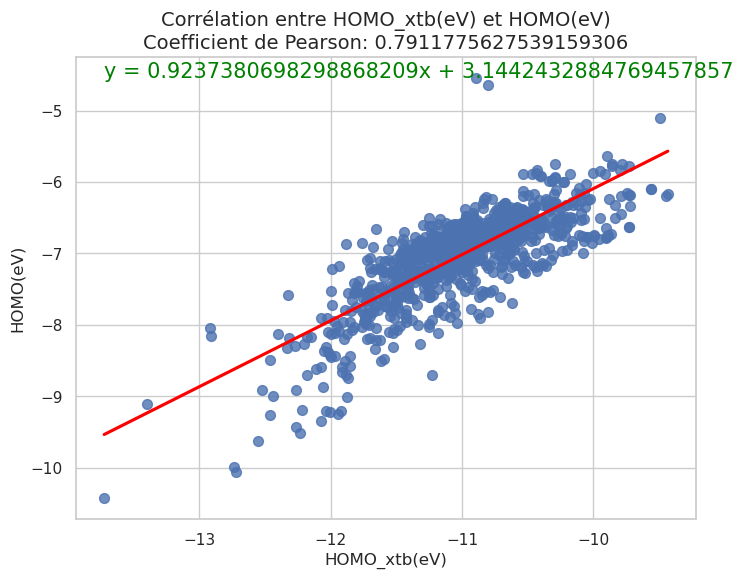

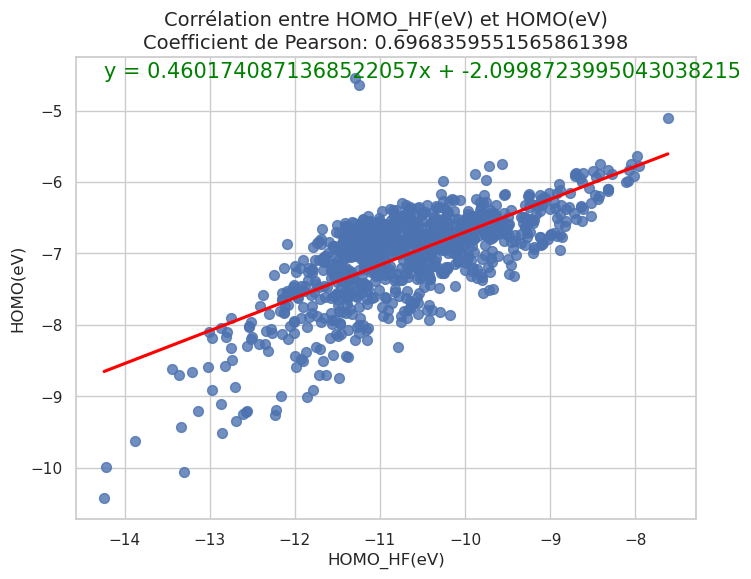

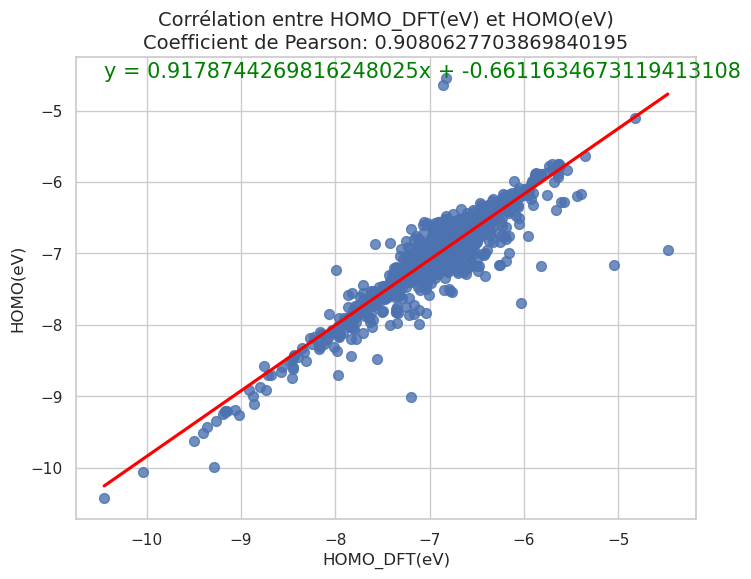

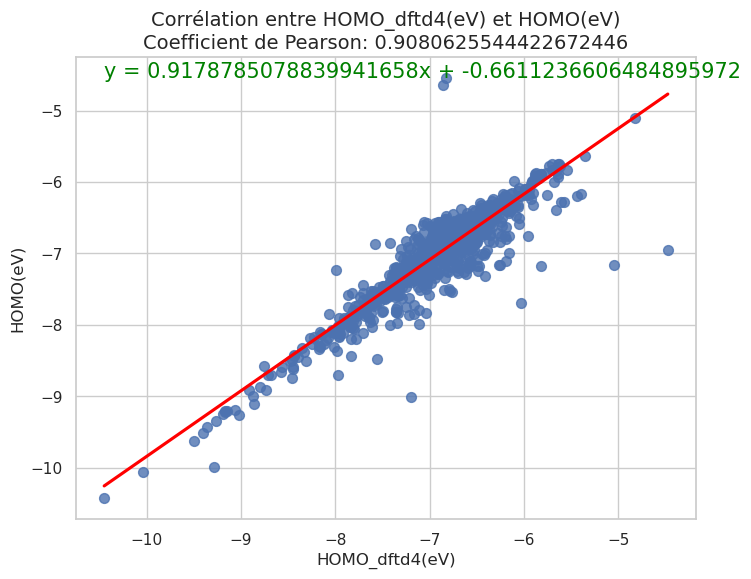

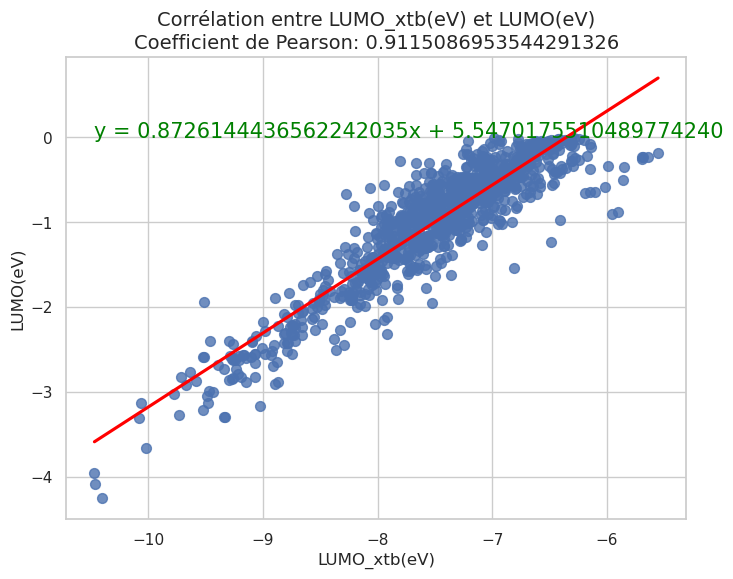

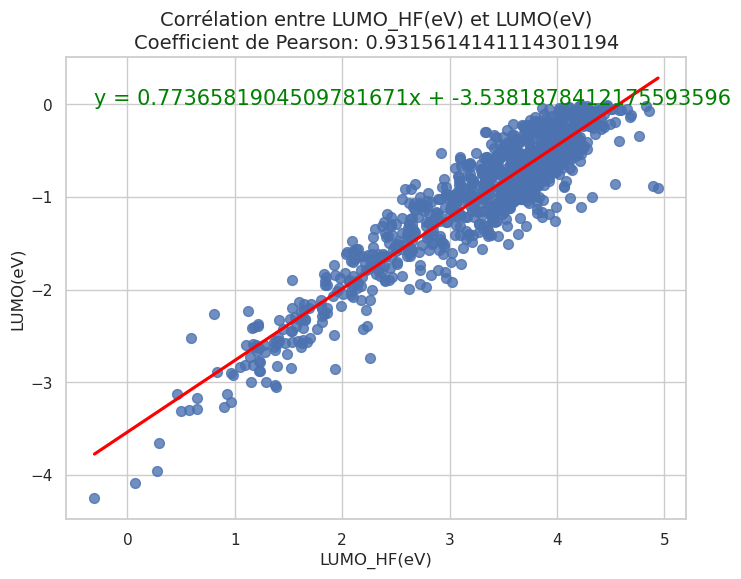

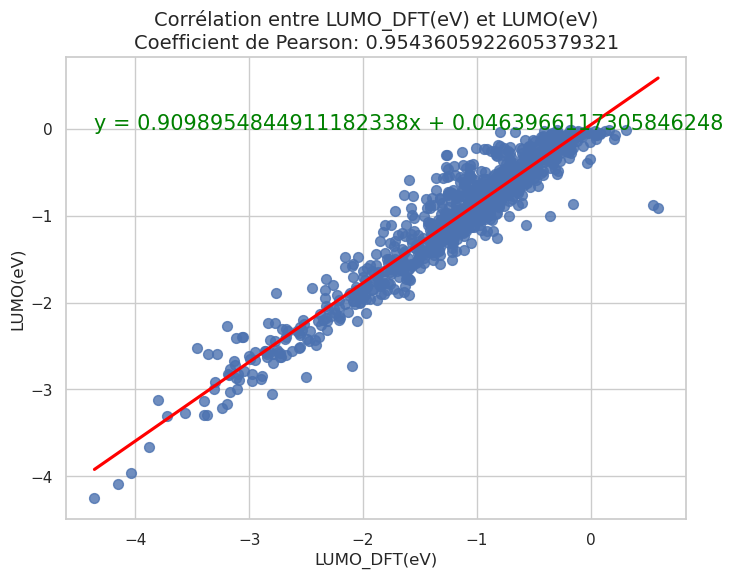

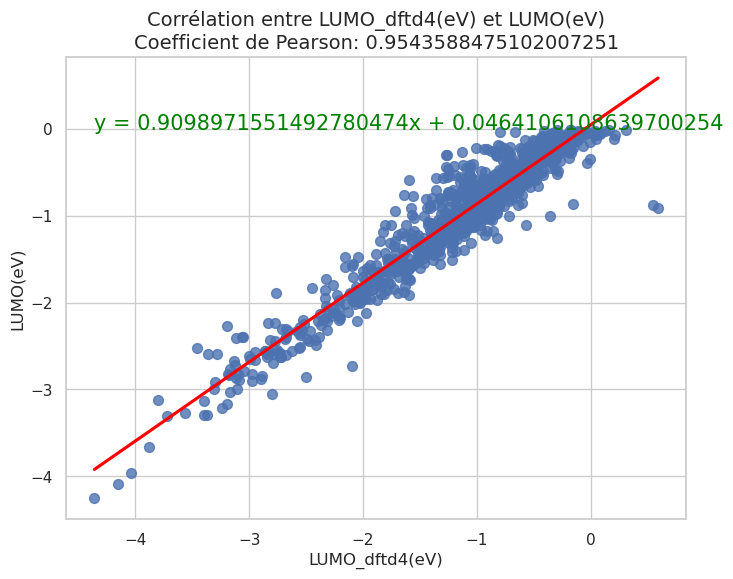

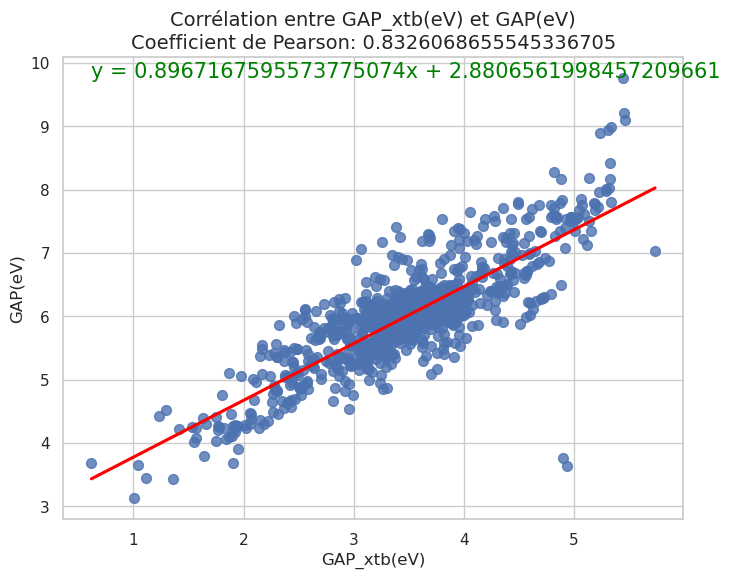

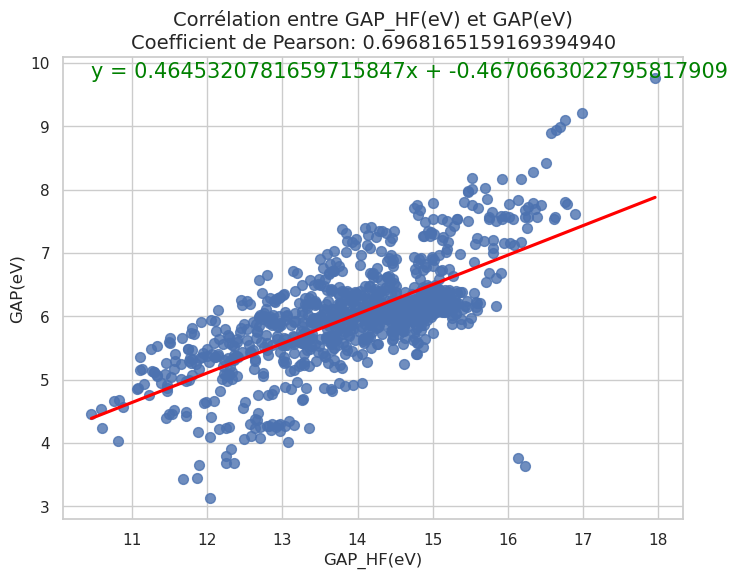

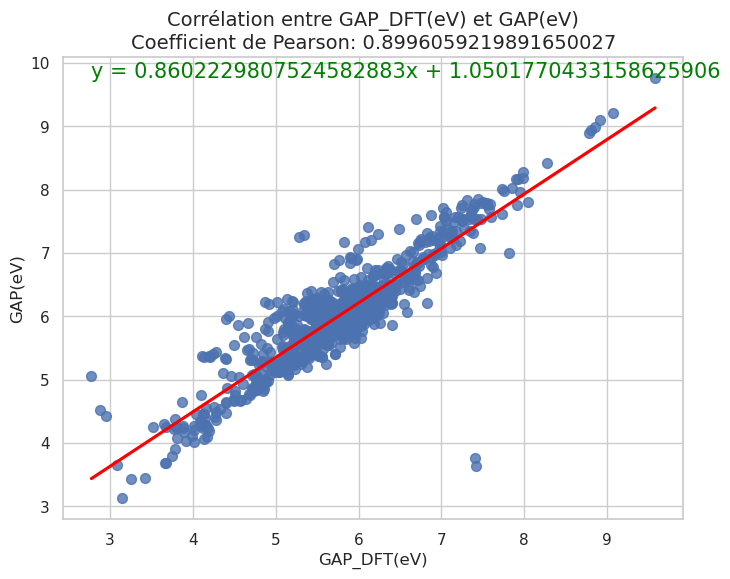

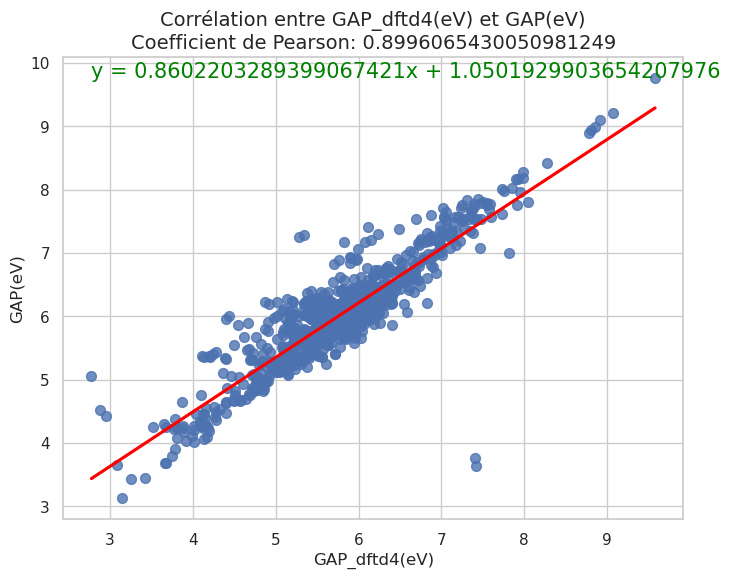

Method  Pearson Coefficient     Slope  Intercept  \
0     HOMO_xtb(eV)             0.791178  0.923738   3.144243   
1      HOMO_HF(eV)             0.696836  0.460174  -2.099872   
2     HOMO_DFT(eV)             0.908063  0.917874  -0.661163   
3   HOMO_dftd4(eV)             0.908063  0.917879  -0.661124   
4     LUMO_xtb(eV)             0.911509  0.872614   5.547018   
5      LUMO_HF(eV)             0.931561  0.773658  -3.538188   
6     LUMO_DFT(eV)             0.954361  0.909895   0.046397   
7   LUMO_dftd4(eV)             0.954359  0.909897   0.046411   
8      GAP_xtb(eV)             0.832607  0.896717   2.880656   
9       GAP_HF(eV)             0.696817  0.464532  -0.467066   
10     GAP_DFT(eV)             0.899606  0.860223   1.050177   
11   GAP_dftd4(eV)             0.899607  0.860220   1.050193   

                                        Line Equation  
0   y = 0.9237380698298868209x + 3.144243288476945...  
1   y = 0.4601740871368522057x + -2.09987239950430...  
2   y = 0.9178744269816248025x + -0.66116346731194...  
3   y = 0.9178785078839941658x + -0.66112366064848...  
4   y = 0.8726144436562242035x + 5.547017551048977...  
5   y = 0.7736581904509781671x + -3.53818784121755...  
6   y = 0.9098954844911182338x + 0.046396611730584...  
7   y = 0.9098971551492780474x + 0.046410610863970...  
8   y = 0.8967167595573775074x + 2.880656199845720...  
9   y = 0.4645320781659715847x + -0.46706630227958...  
10  y = 0.8602229807524582883x + 1.050177043315862...  
11  y = 0.8602203289399067421x + 1.050192990365420...

In [4]:
methods = ['xtb', 'HF', 'DFT', 'dftd4']
properties = ['HOMO', 'LUMO','GAP']
results = []

# Boucle sur chaque paire de colonnes
for prop in properties:
    for method in methods:
        # Noms des colonnes
        col1 = f'{prop}_{method}(eV)'
        col2 = f'{prop}(eV)'
        
        # Vérifier si les colonnes existent dans le DataFrame
        if col1 in df.columns and col2 in df.columns:
            list1 = df[col1]
            list2 = df[col2]
            
            # Calcul du coefficient de Pearson
            pearson_coef, p_value = pearsonr(list1, list2)
            
            # Régression linéaire
            slope, intercept, r_value, p_value, std_err = linregress(list1, list2)
            regress_values = list1 * slope + intercept
            line_eq = f'y = {slope:.19f}x + {intercept:.19f}'

            
            # Stocker les résultats
            results.append({
                'Method': f'{prop}_{method}(eV)',
                'Pearson Coefficient': pearson_coef,
                'Slope': slope,
                'Intercept': intercept,
                'Line Equation': line_eq
            })
            
            # Tracer la corrélation avec Seaborn
            sns.set(style="whitegrid")
            plt.figure(figsize=(8, 6))
            sns.regplot(x=col1, y=col2, data=df, ci=None,
                        scatter_kws={'s': 50}, line_kws={'color': 'red'})
            
            # Ajout du coefficient de corrélation dans le titre
            plt.title(f'Corrélation entre {col1} et {col2}\nCoefficient de Pearson: {pearson_coef:.19f}', fontsize=14)
            plt.xlabel(col1, fontsize=12)
            plt.ylabel(col2, fontsize=12)
            
            # Affichage de l'équation de la régression linéaire sur le graphique
            plt.annotate(line_eq, (min(list1), max(list2)), fontsize=15, color="green")
            
            # Afficher le graphique
            plt.show()

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)
results_df

In [5]:
results_df.to_csv('CALIBRAGE_VALUE_GDB9.csv', index=False)
results_df1.to_csv('CALIBRAGE_VALUE_OB_GDB9.csv', index=False)

In [6]:
results_df

Method  Pearson Coefficient     Slope  Intercept  \
0     HOMO_xtb(eV)             0.791178  0.923738   3.144243   
1      HOMO_HF(eV)             0.696836  0.460174  -2.099872   
2     HOMO_DFT(eV)             0.908063  0.917874  -0.661163   
3   HOMO_dftd4(eV)             0.908063  0.917879  -0.661124   
4     LUMO_xtb(eV)             0.911509  0.872614   5.547018   
5      LUMO_HF(eV)             0.931561  0.773658  -3.538188   
6     LUMO_DFT(eV)             0.954361  0.909895   0.046397   
7   LUMO_dftd4(eV)             0.954359  0.909897   0.046411   
8      GAP_xtb(eV)             0.832607  0.896717   2.880656   
9       GAP_HF(eV)             0.696817  0.464532  -0.467066   
10     GAP_DFT(eV)             0.899606  0.860223   1.050177   
11   GAP_dftd4(eV)             0.899607  0.860220   1.050193   

                                        Line Equation  
0   y = 0.9237380698298868209x + 3.144243288476945...  
1   y = 0.4601740871368522057x + -2.09987239950430...  
2   y = 0.9178744269816248025x + -0.66116346731194...  
3   y = 0.9178785078839941658x + -0.66112366064848...  
4   y = 0.8726144436562242035x + 5.547017551048977...  
5   y = 0.7736581904509781671x + -3.53818784121755...  
6   y = 0.9098954844911182338x + 0.046396611730584...  
7   y = 0.9098971551492780474x + 0.046410610863970...  
8   y = 0.8967167595573775074x + 2.880656199845720...  
9   y = 0.4645320781659715847x + -0.46706630227958...  
10  y = 0.8602229807524582883x + 1.050177043315862...  
11  y = 0.8602203289399067421x + 1.050192990365420...

In [ ]:
results_df1

In [7]:

def calibrate_data(df, results_df):
    # Création d'un DataFrame pour stocker les valeurs calibrées
    calibrated_df = pd.DataFrame()
    
    
    # Parcourir les lignes du DataFrame results_df
    for index, row in results_df.iterrows():
        method = row['Method']
        slope = row['Slope']
        intercept = row['Intercept']
        
        # Vérifier si la colonne existe dans le DataFrame
        if method in df.columns:
            for i in range(len(df)):
                # Extraire les données de la ligne actuelle
                prop_value = df.loc[i, method]
                prop_cal = prop_value * slope + intercept
                
                # Déterminer le nom de la colonne calibrée
                method_parts = method.split('_')
                prop = method_parts[0]
                method_name = method_parts[1].split('(')[0]
                calibrated_col = f'{prop}_{method_name}_calibrated'
                
                # Mettre à jour le DataFrame des valeurs calibrées
                calibrated_df.loc[i,'smiles_key'] = df.loc[i,'smiles_key']
                calibrated_df.loc[i,'SMILES'] = df.loc[i, 'SMILES']
                calibrated_df.loc[i,'HOMO(eV)'] = df.loc[i,'HOMO(eV)']
                calibrated_df.loc[i,'LUMO(eV)'] = df.loc[i,'LUMO(eV)']
                calibrated_df.loc[i,'GAP(eV)'] = df.loc[i,'GAP(eV)']
            
                #calibrated_df.loc[i,'SMILES'] = df.loc[i, 'SMILES']
                calibrated_df.loc[i, calibrated_col] = prop_cal
            
            # Calculer et ajouter la Gap calibrée pour chaque méthode
            # if f'HOMO_{method_name}_calibrated' in calibrated_df.columns and f'LUMO_{method_name}_calibrated' in calibrated_df.columns:
            #     calibrated_df[f'GAP_{method_name}_calibrated'] = calibrated_df[f'LUMO_{method_name}_calibrated'] - calibrated_df[f'HOMO_{method_name}_calibrated']
    
    return calibrated_df

# Appliquer la fonction sur le DataFrame
calibrated_df = calibrate_data(df, results_df)
calibrated_df = calibrate_data(df1, results_df1)
df=calibrated_df
calibrated_df.to_csv('ALL_METHODE_CALIBRAGE_VALUE_GDB9.csv', index=False)
df

smiles_key        SMILES  HOMO(eV)  LUMO(eV)   GAP(eV)  \
0         gdb 6           C=O -7.265440 -1.104782  6.157937   
1        gdb 11          CC=O -6.911692 -0.538785  6.372907   
2        gdb 18       CC(C)=O -6.615088 -0.236739  6.378349   
3        gdb 23        C#CC#C -7.072239 -0.582324  6.492637   
4        gdb 24        C#CC#N -8.440972 -1.477578  6.963394   
...         ...           ...       ...       ...       ...   
997    gdb 2994  CCC(=O)C1CN1 -6.955230 -0.582324  6.372907   
998    gdb 2995  CCC(=O)C1CO1 -6.789241 -0.680285  6.108956   
999    gdb 3003  COC(=O)C1CO1 -7.366122 -0.201364  7.164758   
1000   gdb 3005  OCC(=O)C1CC1 -6.609646 -0.209528  6.400118   
1001   gdb 3006  OCC(=O)C1CN1 -7.254556 -1.050360  6.204196   

      HOMO_xtb_calibrated  HOMO_HF_calibrated  HOMO_DFT_calibrated  \
0               -7.510152           -7.553079            -7.258535   
1               -7.140010           -7.349689            -6.941538   
2               -6.876283           -7.193679            -6.695747   
3               -6.927642           -6.610513            -7.166093   
4               -7.912901           -7.346642            -8.405070   
...                   ...                 ...                  ...   
997             -6.443049           -6.883194            -6.531187   
998             -7.058628           -7.207774            -6.791858   
999             -7.454912           -7.549331            -7.263352   
1000            -7.226195           -7.220894            -6.994716   
1001            -6.797026           -7.102643            -6.748917   

      HOMO_dftd4_calibrated  LUMO_xtb_calibrated  LUMO_HF_calibrated  \
0                 -7.258520            -1.358242           -0.449141   
1                 -6.941513            -0.774638           -0.327715   
2                 -6.695720            -0.337283           -0.209809   
3                 -7.166082             0.293791           -0.860818   
4                 -8.405073            -0.948899           -1.488132   
...                     ...                  ...                 ...   
997               -6.531200            -0.472975           -0.407969   
998               -6.791910            -0.816261           -0.590184   
999               -7.263367            -0.494616           -0.360619   
1000              -6.994729            -0.734236           -0.569677   
1001              -6.748926            -0.881969           -0.763238   

      LUMO_DFT_calibrated  LUMO_dftd4_calibrated  GAP_xtb_calibrated  \
0               -0.835404              -0.835391            6.127349   
1               -0.507600              -0.507584            6.367878   
2               -0.250810              -0.250794            6.561293   
3               -0.524519              -0.524506            7.259619   
4               -1.328364              -1.328402            6.939010   
...                   ...                    ...                 ...   
997             -0.486542              -0.486578            6.001241   
998             -0.736447              -0.736470            6.246077   
999             -0.382906              -0.382874            6.961268   
1000            -0.597864              -0.597891            6.492964   
1001            -0.876468              -0.876467            5.924598   

      GAP_HF_calibrated  GAP_DFT_calibrated  GAP_dftd4_calibrated  
0              6.892558            6.399508              6.399503  
1              6.760150            6.412330              6.412319  
2              6.673458            6.424749              6.424736  
3              5.693880            6.606785              6.606784  
4              6.060318            7.007980              7.007939  
...                 ...                 ...                   ...  
997            6.241050            6.047661              6.047641  
998            6.459296            6.055698              6.055725  
999            6.941926            6.831818              6.831858

In [8]:
df=df.iloc[600:700,:]
df

smiles_key          SMILES  HOMO(eV)  LUMO(eV)   GAP(eV)  \
600   gdb 1779    CC1NC1(C)C=O -6.957951 -0.892533  6.065418   
601   gdb 1780    CC1OC1(C)C=O -6.906250 -0.925187  5.981063   
602   gdb 1781    CN1CC1(C)C=O -6.473589 -0.579603  5.893986   
603   gdb 1782    OC1CC1(O)C=O -6.767472 -0.745592  6.019159   
604   gdb 1798  CC(=O)C1(C)CC1 -6.533454 -0.223133  6.310320   
..         ...             ...       ...       ...       ...   
695   gdb 2117     N=C1NCCC1=O -6.495358 -1.417713  5.077645   
696   gdb 2118     N=C1OCCC1=O -7.042307 -1.891191  5.151115   
697   gdb 2119     N=C1OCOC1=N -7.692659 -1.210907  6.484473   
698   gdb 2120     N=C1OCOC1=O -7.907629 -1.684385  6.223244   
699   gdb 2121     O=C1CCCC1=O -6.296715 -2.394602  3.902113   

     HOMO_xtb_calibrated  HOMO_HF_calibrated  HOMO_DFT_calibrated  \
600            -6.647473           -6.811836            -6.659115   
601            -7.193587           -7.136919            -6.974761   
602            -6.297653           -6.625391            -6.248818   
603            -6.941406           -6.869506            -6.597680   
604            -6.630938           -7.030437            -6.652124   
..                   ...                 ...                  ...   
695            -6.318252           -6.618847            -6.563212   
696            -6.892356           -7.202927            -7.162333   
697            -7.091236           -7.095313            -7.625313   
698            -7.494171           -7.465743            -7.846791   
699            -6.711118           -7.040924            -6.593882   

     HOMO_dftd4_calibrated  LUMO_xtb_calibrated  LUMO_HF_calibrated  \
600              -6.659096            -0.790519           -0.395421   
601              -6.974796            -1.147768           -0.699513   
602              -6.248821            -0.883540           -0.734755   
603              -6.597690            -1.129356           -0.981348   
604              -6.652138            -0.238242           -0.238112   
..                     ...                  ...                 ...   
695              -6.563233            -1.214435           -1.659798   
696              -7.162341            -1.719592           -1.942129   
697              -7.625305            -1.324123           -1.447416   
698              -7.846766            -1.812525           -1.788375   
699              -6.593867            -2.060086           -2.322193   

     LUMO_DFT_calibrated  LUMO_dftd4_calibrated  GAP_xtb_calibrated  \
600            -0.645128              -0.645148            5.873298   
601            -0.991440              -0.991464            6.036390   
602            -0.802431              -0.802466            5.438134   
603            -1.096443              -1.096469            5.810440   
604            -0.318882              -0.318894            6.424920   
..                   ...                    ...                 ...   
695            -1.511941              -1.511954            5.118206   
696            -1.874911              -1.874914            5.156304   
697            -1.232885              -1.232876            5.755820   
698            -1.650630              -1.650617            5.645021   
699            -2.387401              -2.387394            4.630558   

     GAP_HF_calibrated  GAP_DFT_calibrated  GAP_dftd4_calibrated  
600           6.176551            6.017625              6.017590  
601           6.322125            5.986040              5.986050  
602           5.784592            5.484384              5.484358  
603           5.882955            5.533372              5.533361  
604           6.491675            6.319510              6.319510  
..                 ...                 ...                   ...  
695           5.222557            5.108254              5.108267  
696           5.642647            5.326589              5.326596  
697           5.831057            6.367467              6.367464  
698           6.000271        

/tmp/ipykernel_3723/2877889623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_HOMO_xtb'] = df['HOMO(eV)'] - df['HOMO_xtb_calibrated']


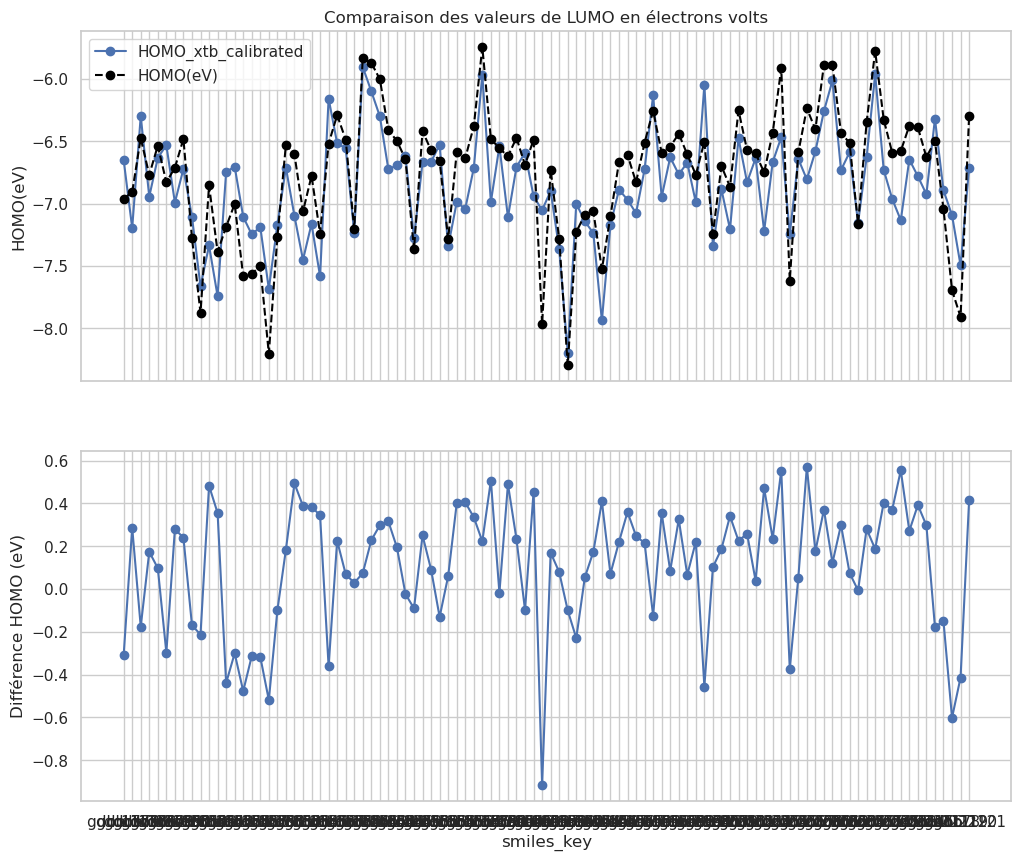

In [10]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode
df['diff_HOMO_xtb'] = df['HOMO(eV)'] - df['HOMO_xtb_calibrated']
# df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']
# df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']
# df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['xtb']
gap_cols = [f'HOMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_HOMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'HOMO_{method}_calibrated'], marker='o', label=f'HOMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['HOMO(eV)'], marker='o', label='HOMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('HOMO(eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/3177328511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']


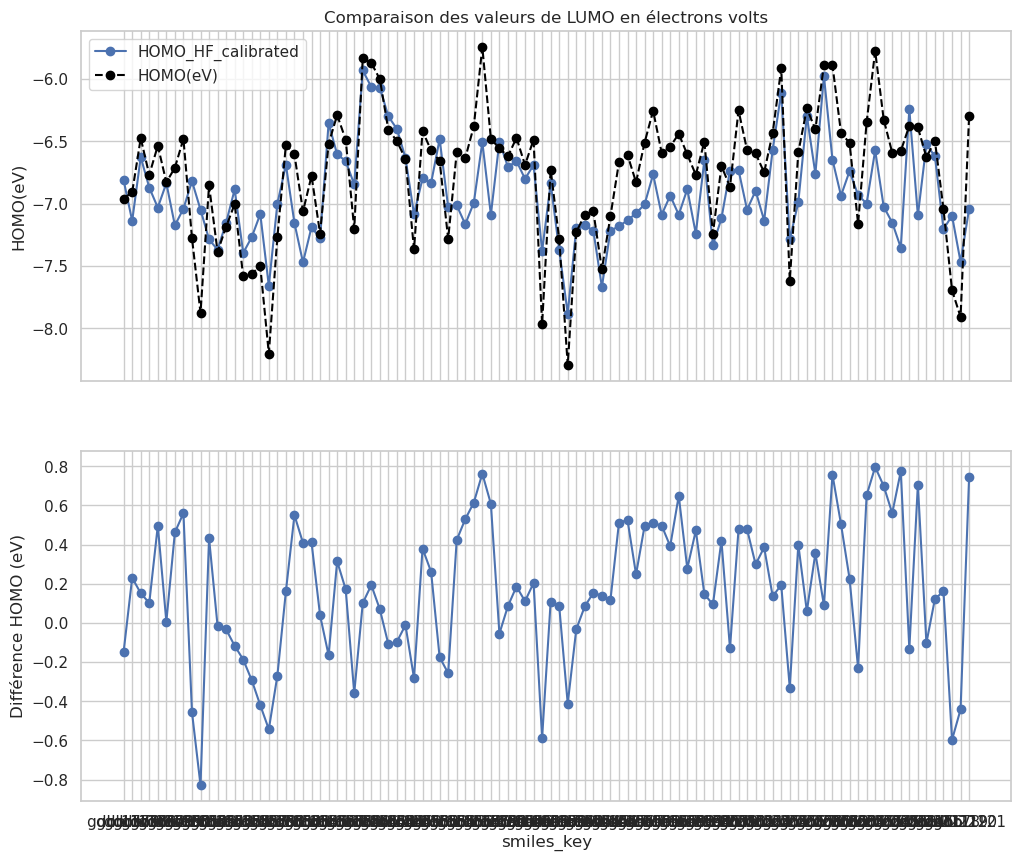

In [11]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode

df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']


# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['HF']
gap_cols = [f'HOMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_HOMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'HOMO_{method}_calibrated'], marker='o', label=f'HOMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['HOMO(eV)'], marker='o', label='HOMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('HOMO(eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/2173027584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']


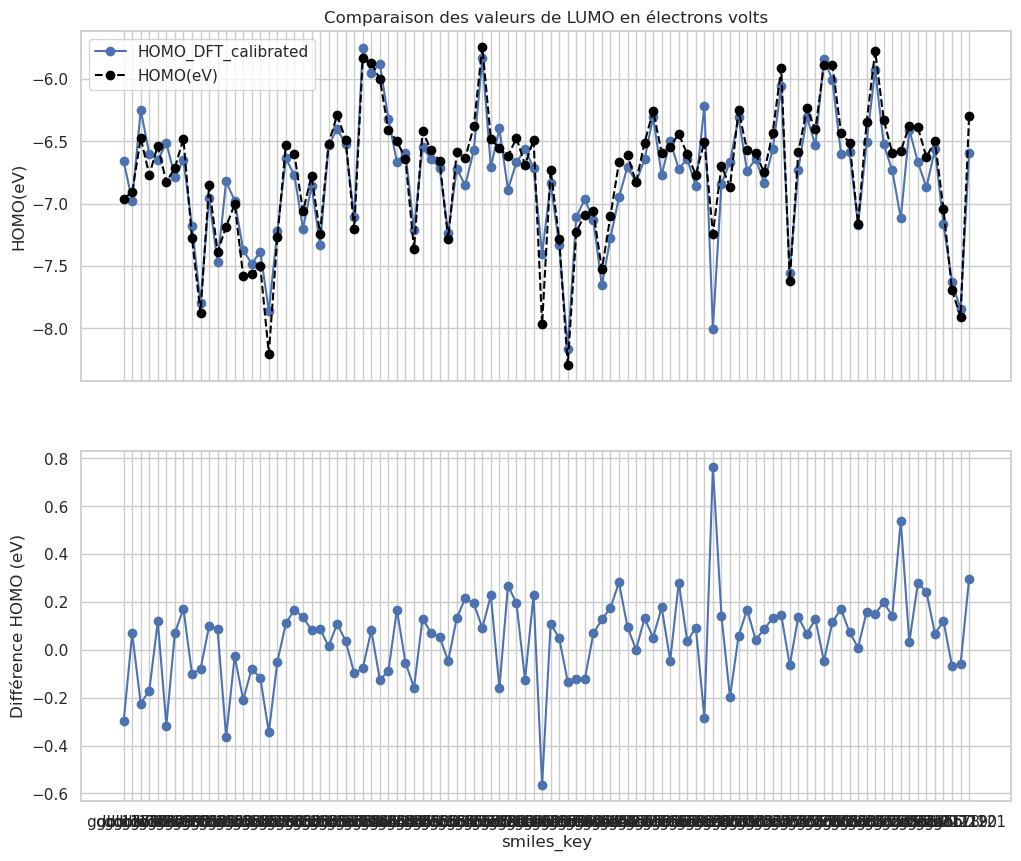

In [12]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode

df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']


# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['DFT']
gap_cols = [f'HOMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_HOMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'HOMO_{method}_calibrated'], marker='o', label=f'HOMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['HOMO(eV)'], marker='o', label='HOMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('HOMO(eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/5251122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']


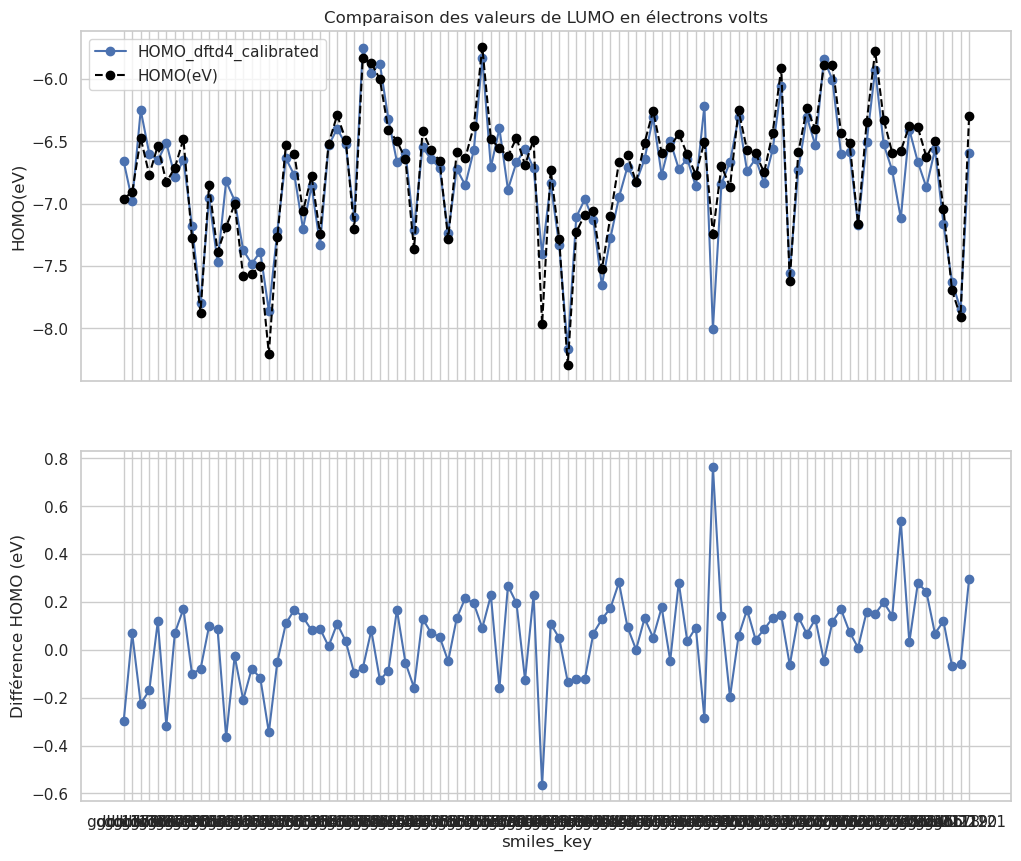

In [13]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode

df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']



# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['dftd4']
gap_cols = [f'HOMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_HOMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'HOMO_{method}_calibrated'], marker='o', label=f'HOMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['HOMO(eV)'], marker='o', label='HOMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('HOMO(eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/851284732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_LUMO_xtb'] = df['LUMO(eV)'] - df['LUMO_xtb_calibrated']


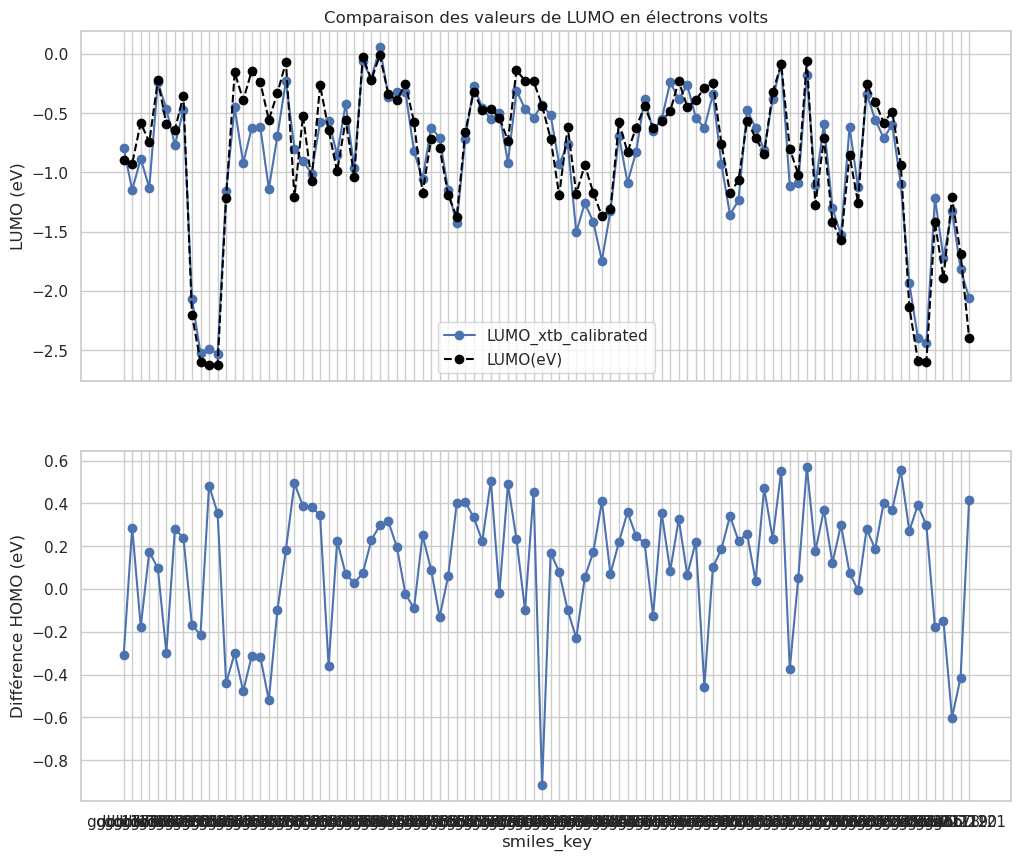

In [14]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
df['diff_LUMO_xtb'] = df['LUMO(eV)'] - df['LUMO_xtb_calibrated']
#df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']
# df['diff_LUMO_DFT'] = df['LUMO(eV)'] - df['LUMO_DFT_calibrated']
# df['diff_LUMO_dftd4'] = df['LUMO(eV)'] - df['LUMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['xtb']
gap_cols = [f'LUMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_LUMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'LUMO_{method}_calibrated'], marker='o', label=f'LUMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['LUMO(eV)'], marker='o', label='LUMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('LUMO (eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/3927559287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']


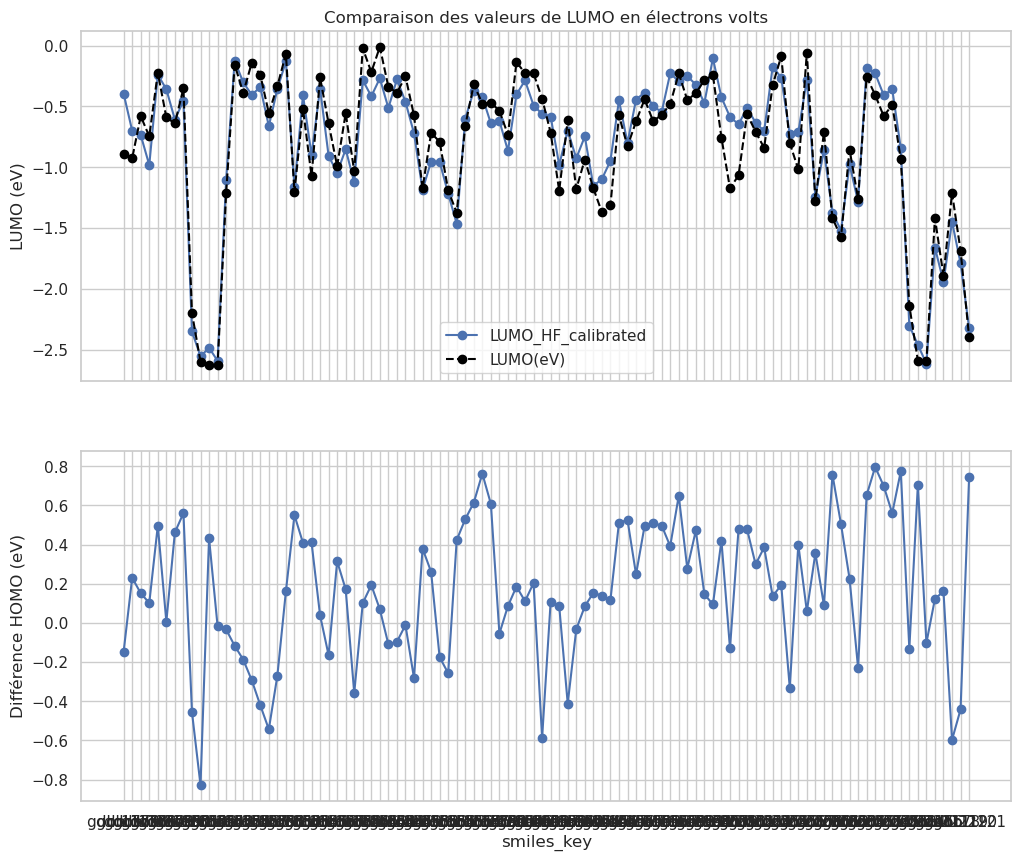

In [15]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
# df['diff_LUMO_xtb'] = df['LUMO(eV)'] - df['LUMO_xtb_calibrated']
df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']
# df['diff_LUMO_DFT'] = df['LUMO(eV)'] - df['LUMO_DFT_calibrated']
# df['diff_LUMO_dftd4'] = df['LUMO(eV)'] - df['LUMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['HF']
gap_cols = [f'LUMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_LUMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'LUMO_{method}_calibrated'], marker='o', label=f'LUMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['LUMO(eV)'], marker='o', label='LUMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('LUMO (eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/2229351593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_LUMO_dftd4'] = df['LUMO(eV)'] - df['LUMO_dftd4_calibrated']


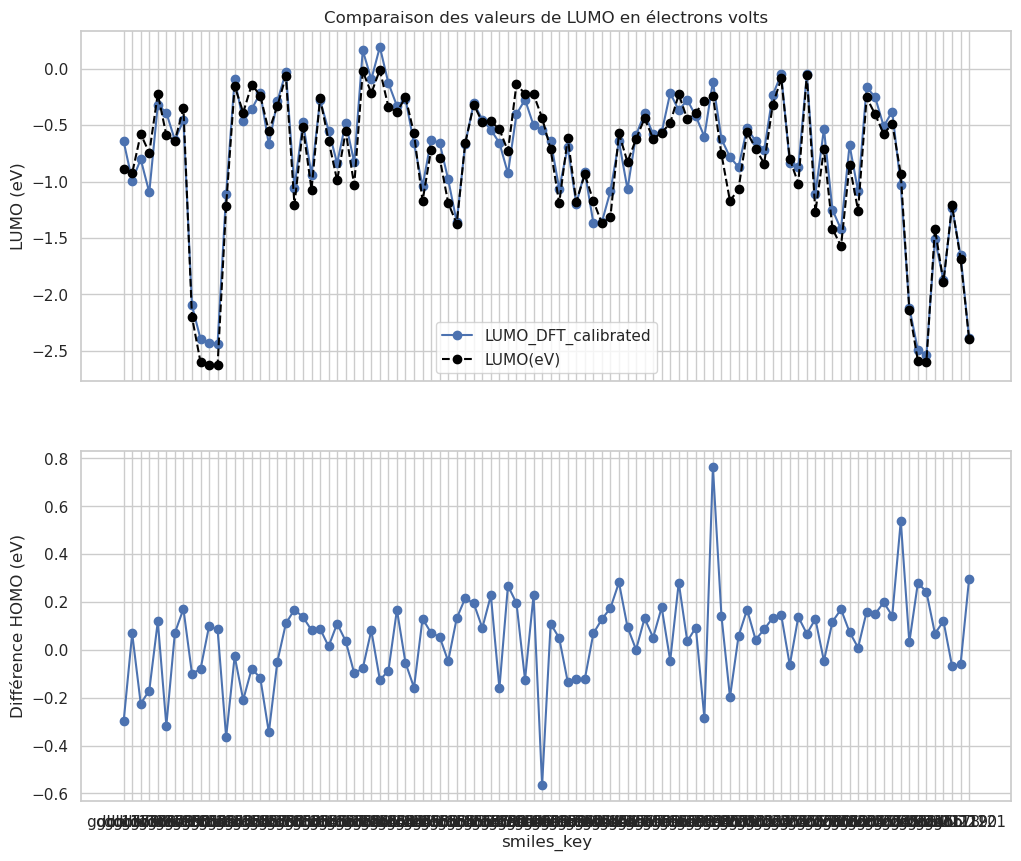

In [16]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode

df['diff_LUMO_dftd4'] = df['LUMO(eV)'] - df['LUMO_dftd4_calibrated']
# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['DFT']
gap_cols = [f'LUMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_LUMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'LUMO_{method}_calibrated'], marker='o', label=f'LUMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['LUMO(eV)'], marker='o', label='LUMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('LUMO (eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/2996590658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']


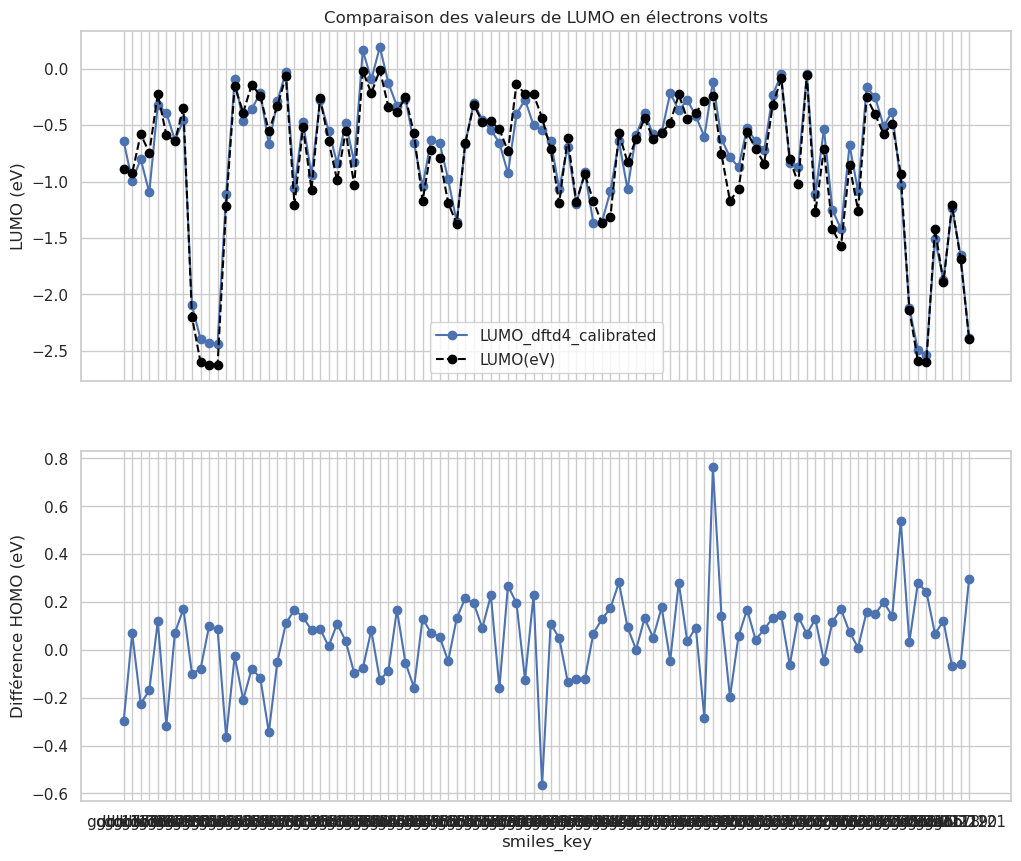

In [17]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode

df['diff_LUMO_HF'] = df['LUMO(eV)'] - df['LUMO_HF_calibrated']


# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['dftd4']
gap_cols = [f'LUMO_{method}_calibrated' for method in methods]
diff_cols = [f'diff_LUMO_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'LUMO_{method}_calibrated'], marker='o', label=f'LUMO_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['LUMO(eV)'], marker='o', label='LUMO(eV)', linestyle='--', color='black')
ax[0].set_ylabel('LUMO (eV)')
ax[0].set_title('Comparaison des valeurs de LUMO en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_HOMO_{method}'], marker='o', label=f'diff_HOMO_{method}')
ax[1].set_ylabel('Différence HOMO (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/3999284610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']


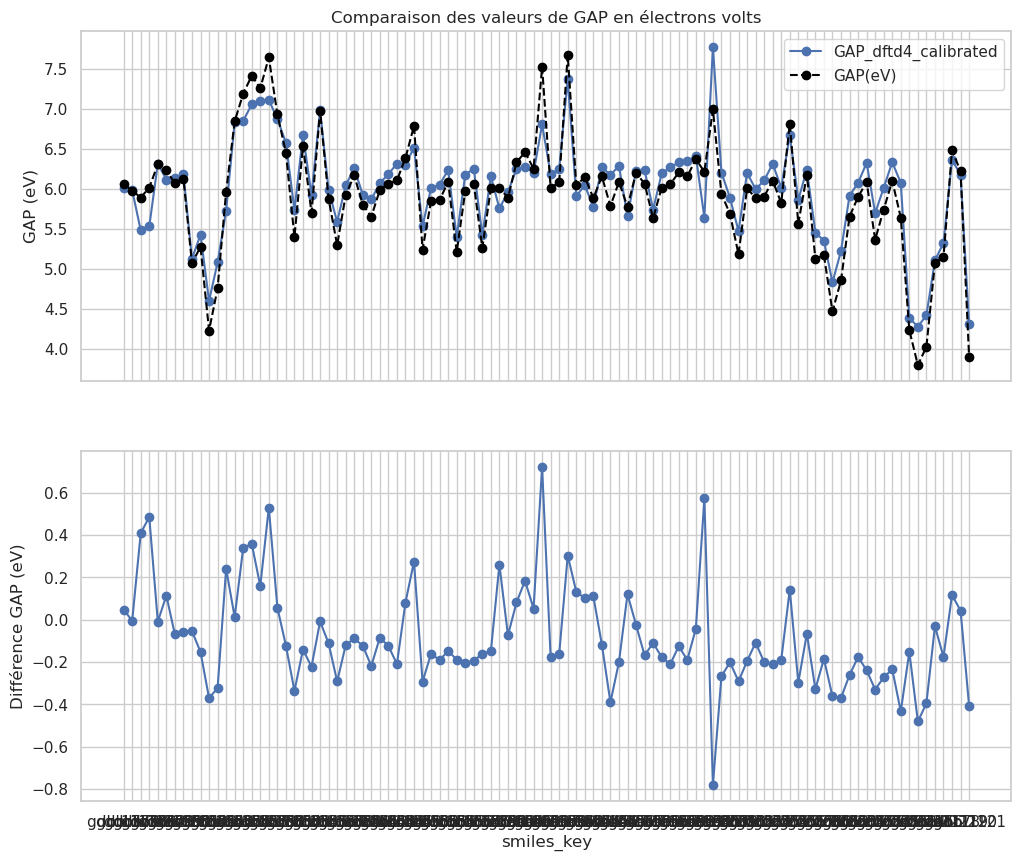

In [19]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
# df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']
# df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']
# df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']
df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['dftd4']
gap_cols = [f'GAP_{method}_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'GAP_{method}_calibrated'], marker='o', label=f'GAP_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP (eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_GAP_{method}'], marker='o', label=f'diff_GAP_{method}')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/1307361768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']


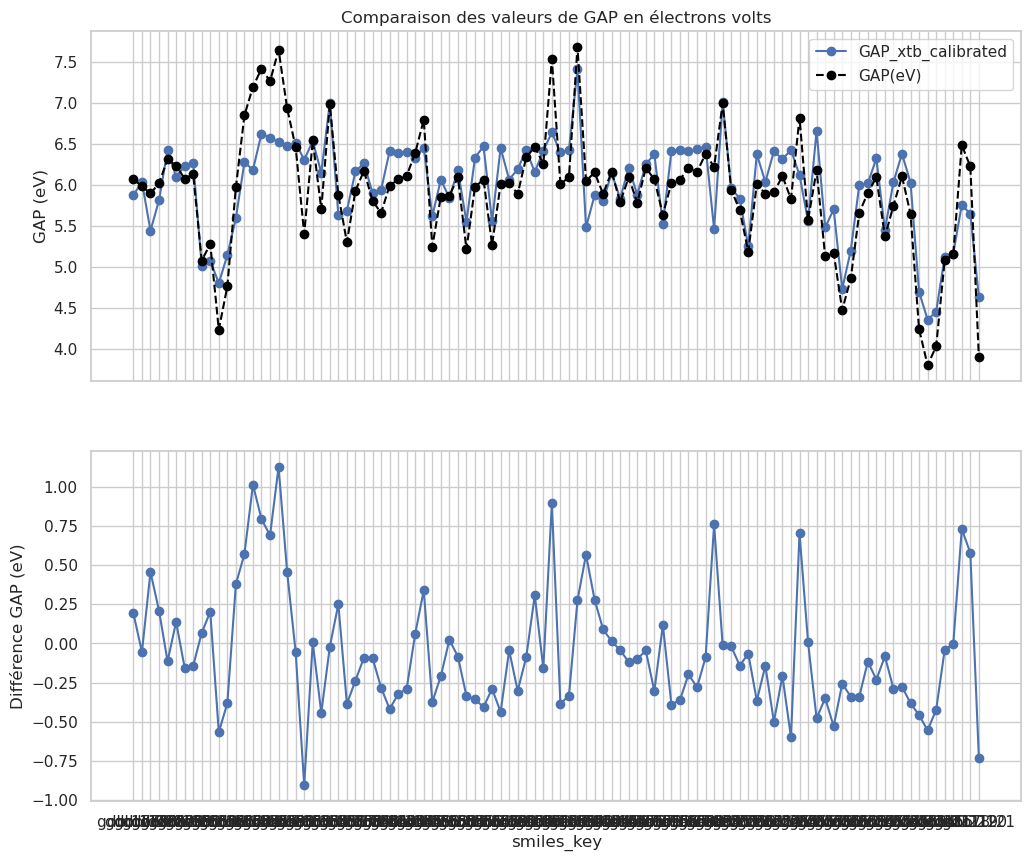

In [20]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']
# df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']
# df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']
# df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['xtb']
gap_cols = [f'GAP_{method}_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'GAP_{method}_calibrated'], marker='o', label=f'GAP_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP (eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_GAP_{method}'], marker='o', label=f'diff_GAP_{method}')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/3975588910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']


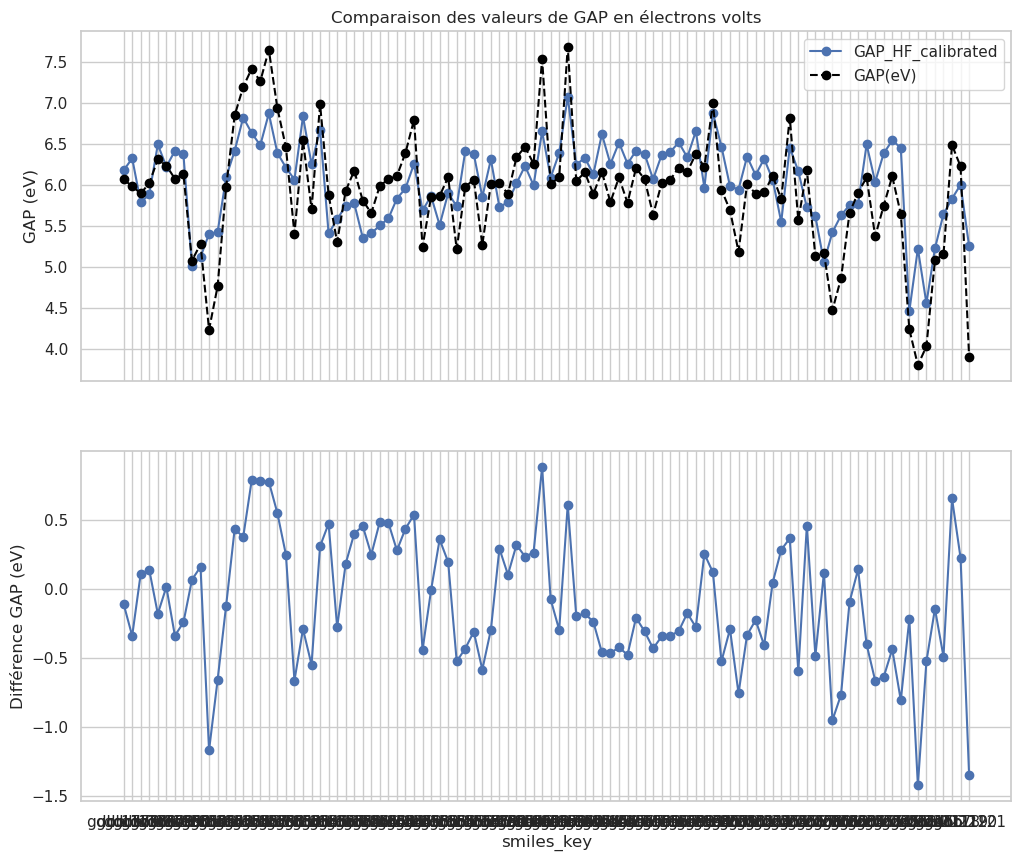

In [22]:
# # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
# df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']
df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']
# df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']
# df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['HF']
gap_cols = [f'GAP_{method}_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'GAP_{method}_calibrated'], marker='o', label=f'GAP_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP (eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_GAP_{method}'], marker='o', label=f'diff_GAP_{method}')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_3723/1614700928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']


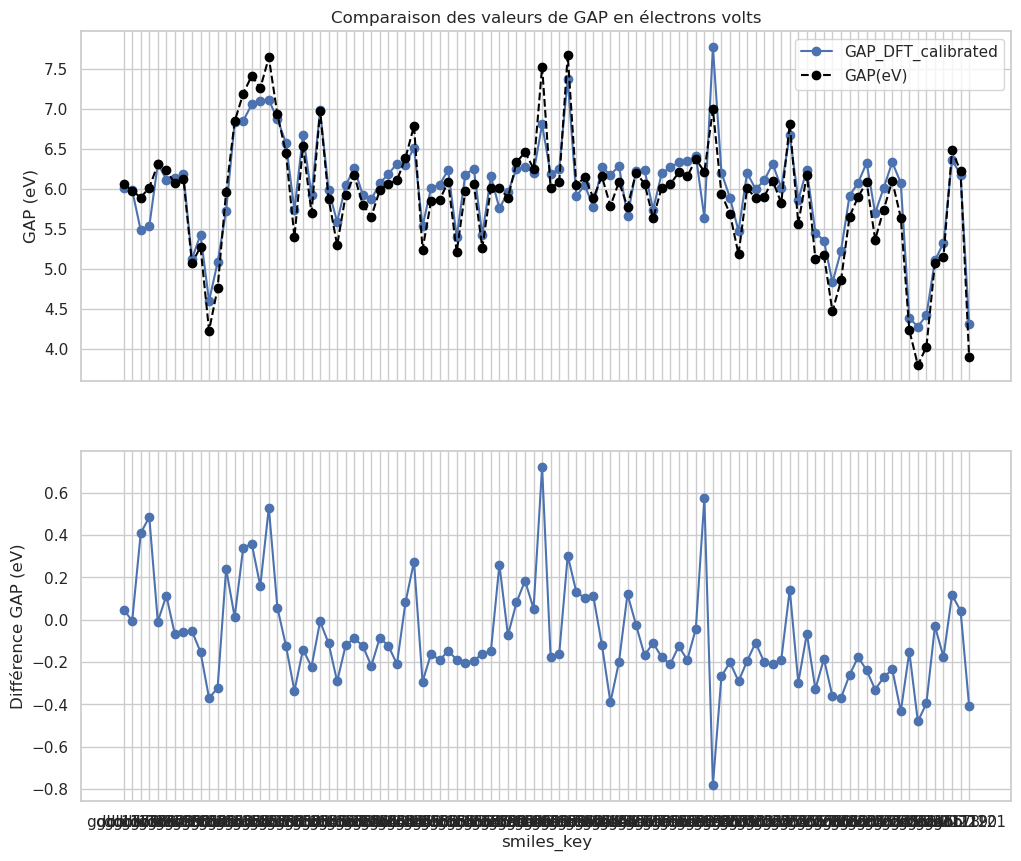

In [24]:
# # # Calculer la différence entre GAP non calibré et calibré pour chaque méthode
# df['diff_GAP_xtb'] = df['GAP(eV)'] - df['GAP_xtb_calibrated']
# df['diff_GAP_HF'] = df['GAP(eV)'] - df['GAP_HF_calibrated']
df['diff_GAP_DFT'] = df['GAP(eV)'] - df['GAP_DFT_calibrated']
# df['diff_GAP_dftd4'] = df['GAP(eV)'] - df['GAP_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

methods = ['DFT']
gap_cols = [f'GAP_{method}_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(df['smiles_key'], df[f'GAP_{method}_calibrated'], marker='o', label=f'GAP_{method}_calibrated')
ax[0].plot(df['smiles_key'], df['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP (eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts')
ax[0].grid(True)
ax[0].legend()

# Différence GAP
for method in methods:
    ax[1].plot(df['smiles_key'], df[f'diff_GAP_{method}'], marker='o', label=f'diff_GAP_{method}')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)